# COSC 3337 Lab 12 Minh Nguyen

## Import the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [2]:
customer_df = pd.read_csv('customers.csv')
customer_df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's just drop the `CustomerID` column

In [3]:
customer_df.drop(['CustomerID'], axis=1, inplace=True)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Draw a heatmap to check multicollinearity

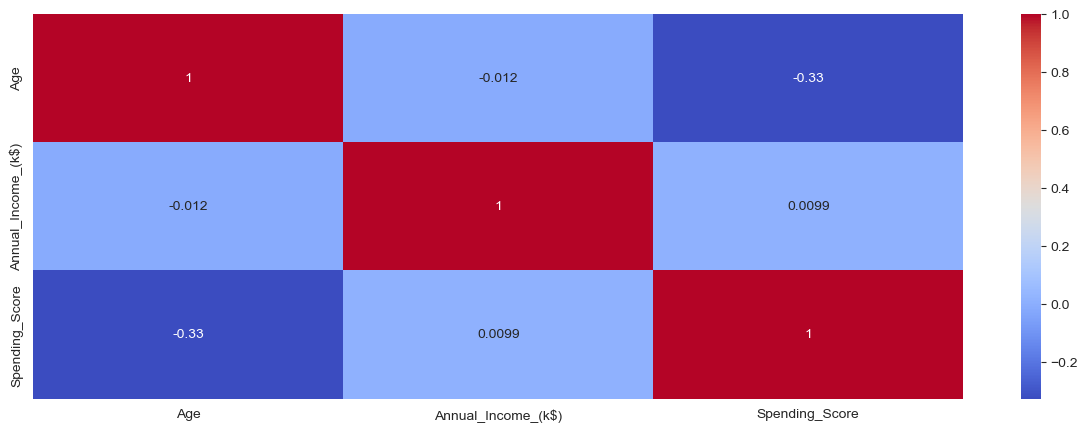

In [5]:
sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm')
plt.show()

- We don't have any signs of multicollinearity here.

Pie chart

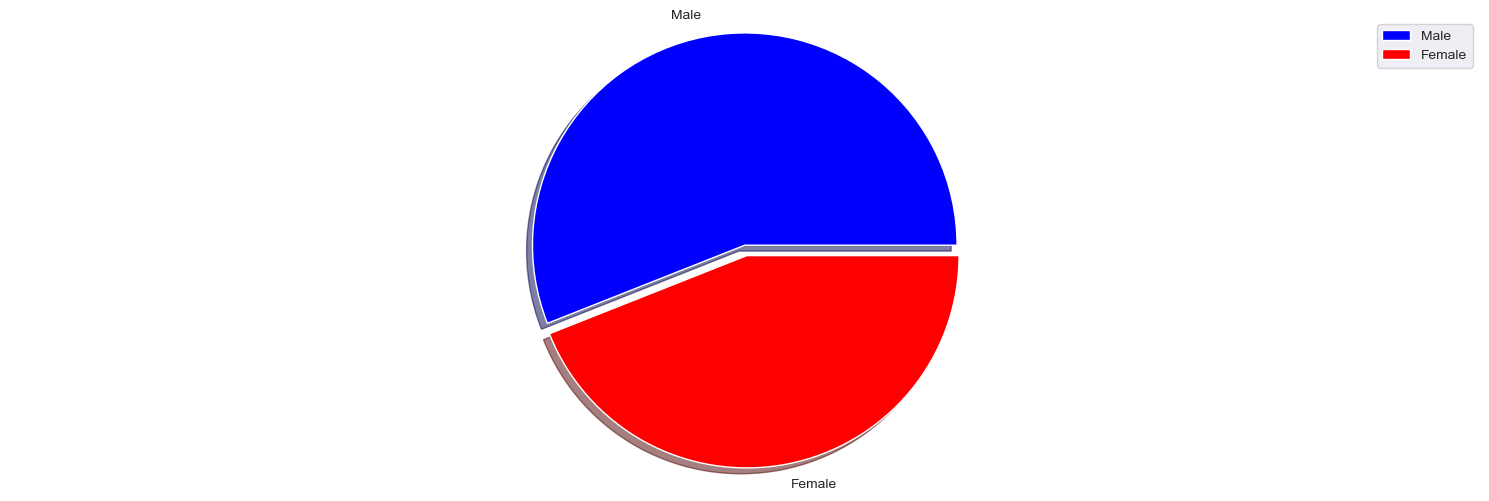

In [13]:
plt.pie(customer_df['Genre'].value_counts(), labels=['Male','Female'], colors=['Blue','Red'], shadow=True,
        explode=[0,0.05])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

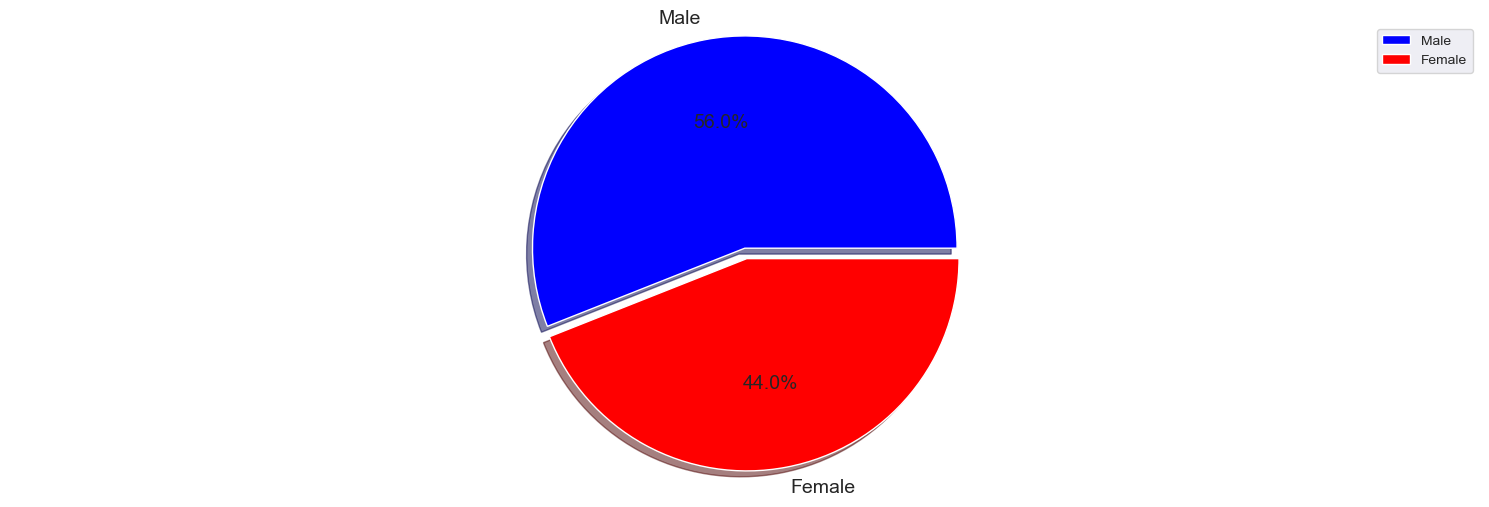

In [18]:
# Calculate the percentage of each value in the 'Genre' column
genre_percentages = customer_df['Genre'].value_counts(normalize=True) * 100

# Create the pie chart with percentage labels
plt.pie(genre_percentages, labels=['Male','Female'], colors=['Blue','Red'], shadow=True,
        explode=[0,0.05], autopct='%1.1f%%', textprops={'fontsize': 14})

plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

- Just a slight difference between `Male` and `Female` observations

## Implementation

We'll only work with 2 variables (spending score and income) so that we can visualize our clusters in the end.

In [19]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

We can create our model with with `eps=3`, `min_samples=4`, and `metric='euclidean'`, and run the X vector we created earlier with spending score and income through to get our predictions.

In [20]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=4, metric='euclidean')
db.fit(X)

DBSCAN(eps=3, min_samples=4)

In [21]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

We have a total of 9 different clusters. We can go ahead and make our predictions and visualize them.

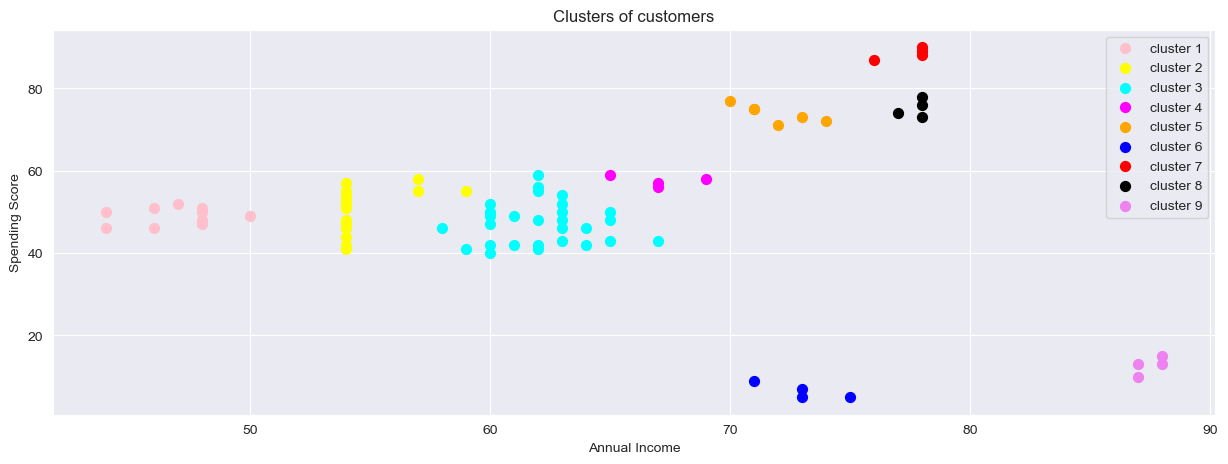

In [22]:
y_preds = db.fit_predict(X)

plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], s = 50, c = 'pink', label='cluster 1')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], s = 50, c = 'yellow', label='cluster 2')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1], s = 50, c = 'cyan', label='cluster 3')
plt.scatter(X[y_preds == 3, 0], X[y_preds == 3, 1], s = 50, c = 'magenta', label='cluster 4')
plt.scatter(X[y_preds == 4, 0], X[y_preds == 4, 1], s = 50, c = 'orange', label='cluster 5')
plt.scatter(X[y_preds == 5, 0], X[y_preds == 5, 1], s = 50, c = 'blue', label='cluster 6')
plt.scatter(X[y_preds == 6, 0], X[y_preds == 6, 1], s = 50, c = 'red', label='cluster 7')
plt.scatter(X[y_preds == 7, 0], X[y_preds == 7, 1], s = 50, c = 'black', label='cluster 8')
plt.scatter(X[y_preds == 8, 0], X[y_preds == 8, 1], s = 50, c = 'violet', label='cluster 9')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [24]:
db1 = DBSCAN(eps=5, min_samples=4, metric='euclidean')
db1.fit(X)

DBSCAN(eps=5, min_samples=4)

In [25]:
db1.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In this case, we're gonna have 7 clusters

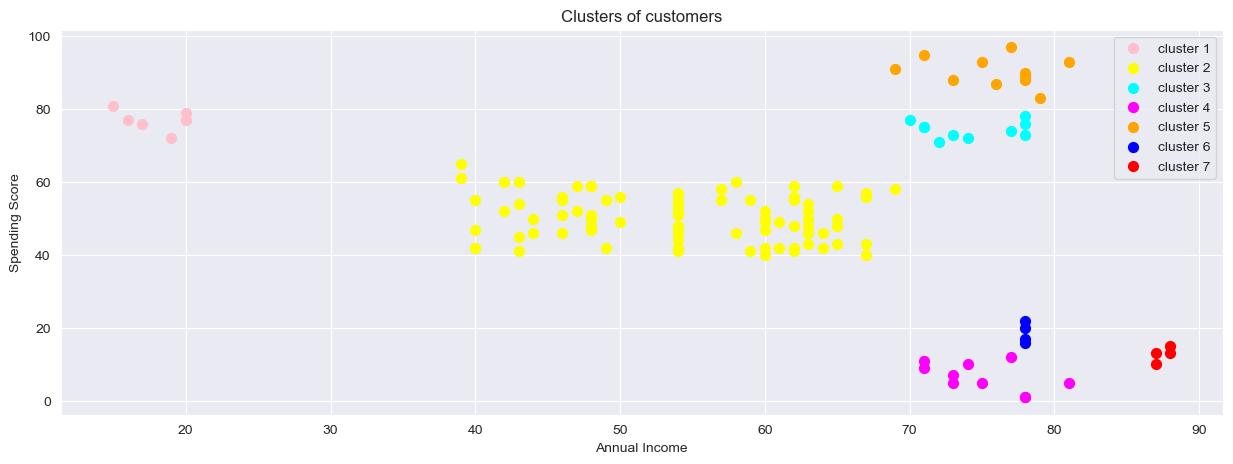

In [27]:
y_preds1 = db1.fit_predict(X)

plt.scatter(X[y_preds1 == 0, 0], X[y_preds1 == 0, 1], s = 50, c = 'pink', label='cluster 1')
plt.scatter(X[y_preds1 == 1, 0], X[y_preds1 == 1, 1], s = 50, c = 'yellow', label='cluster 2')
plt.scatter(X[y_preds1 == 2, 0], X[y_preds1 == 2, 1], s = 50, c = 'cyan', label='cluster 3')
plt.scatter(X[y_preds1 == 3, 0], X[y_preds1 == 3, 1], s = 50, c = 'magenta', label='cluster 4')
plt.scatter(X[y_preds1 == 4, 0], X[y_preds1 == 4, 1], s = 50, c = 'orange', label='cluster 5')
plt.scatter(X[y_preds1 == 5, 0], X[y_preds1 == 5, 1], s = 50, c = 'blue', label='cluster 6')
plt.scatter(X[y_preds1 == 6, 0], X[y_preds1 == 6, 1], s = 50, c = 'red', label='cluster 7')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()